In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree


In [2]:
import pandas as pd
data=pd.read_csv("water_potability.csv")
print(data.shape)
data.head(10)

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [3]:
# number of null value in ph column
print(data.ph.isna().sum())
# number of value in ph column (count)
print(data.shape[0]-data.ph.isna().sum())
# descriptions
print(data.describe())

491
2785
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.

In [4]:
print(data.columns)
# class distribution
print(data.groupby('Potability').size())


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')
Potability
0    1998
1    1278
dtype: int64


In [5]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:

print("Befor clean missing value\nnumber of case 'water is not potable ' depend on ph column:")
print(data[(data['ph'] < 6.5) | (data['ph'] > 8.5)].shape[0])


Befor clean missing value
number of case 'water is not potable ' depend on ph column:
1457


In [7]:
from sklearn.impute import SimpleImputer
# Handling Missing Values
# Replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print("After clean missing value  \nnumber of case 'water is not potable ' depend on ph column:")
print(data_imputed[(data_imputed['ph'] < 6.5) | (data_imputed['ph'] > 8.5)].shape[0])

data_imputed.isna().sum()

After clean missing value  
number of case 'water is not potable ' depend on ph column:
1457


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
df_one_hot = pd.get_dummies(data_imputed, columns=['Potability'])
df_one_hot.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability_0.0,Potability_1.0
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,1,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,1,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,1,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,1,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,1,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,1,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,1,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,1,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,1,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,1,0


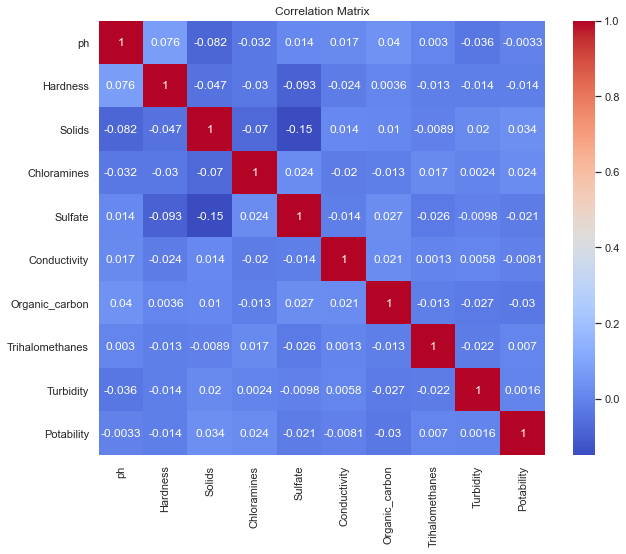

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns you want to include in the correlation matrix
numerical_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# Calculate the correlation matrix using the selected numerical columns
correlation_matrix = data_imputed[numerical_columns].corr()

# Set up the plot figure with a specified size (10 inches by 8 inches)
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn, with annotations and a coolwarm color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Matrix')

# Display the plot
plt.show()


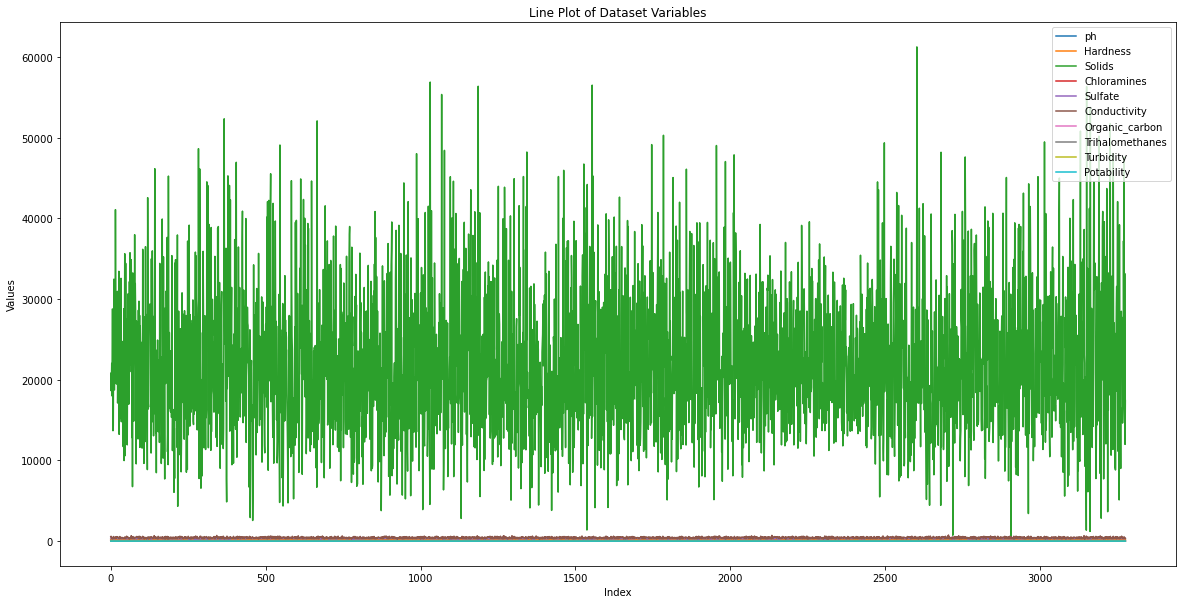

In [10]:
plt.figure(figsize=(20, 10))
for column in data_imputed.columns:
    plt.plot(data_imputed.index, data_imputed[column], label=column)

plt.title('Line Plot of Dataset Variables')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.show()

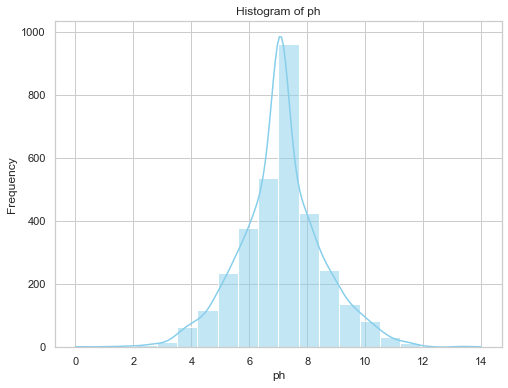

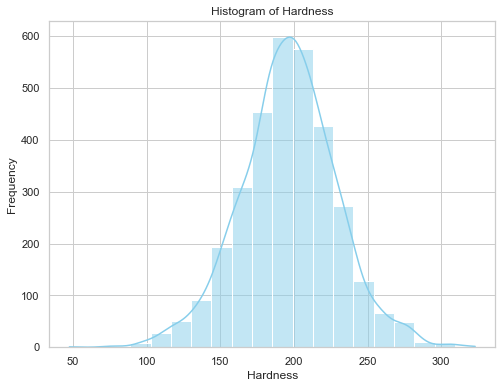

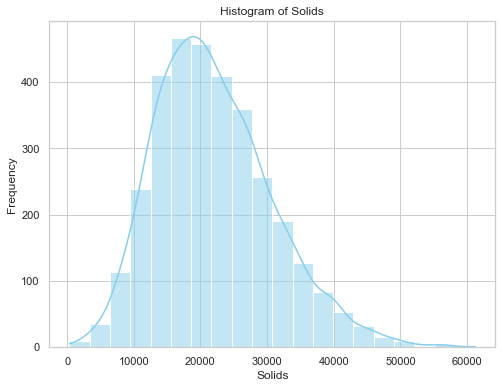

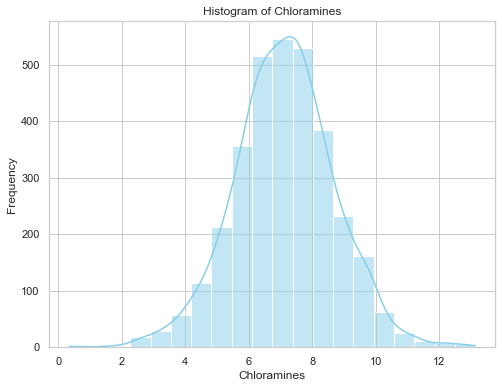

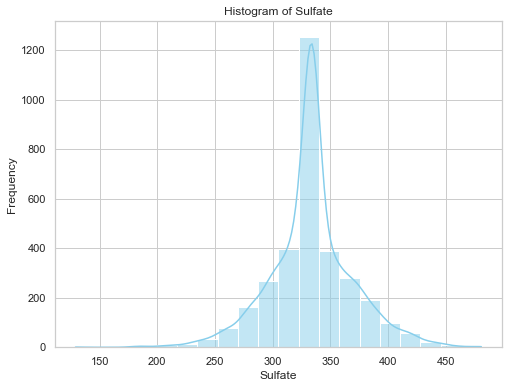

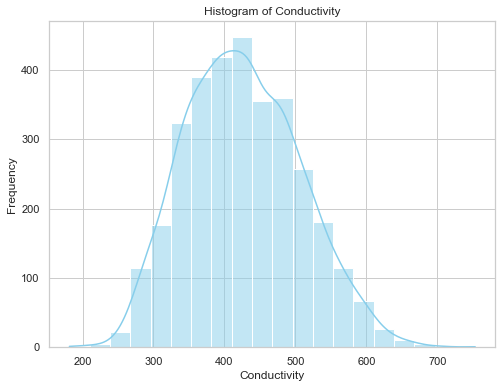

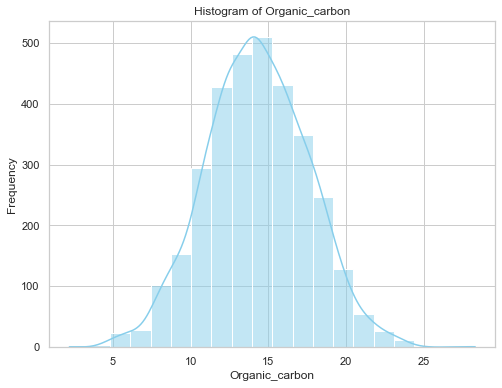

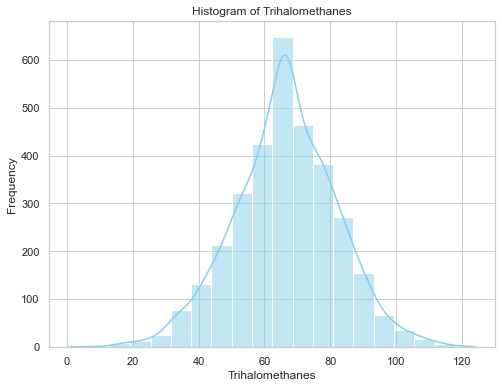

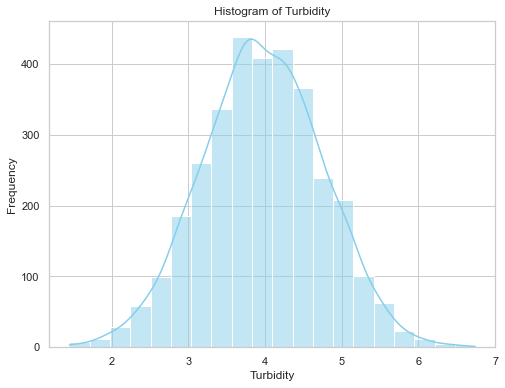

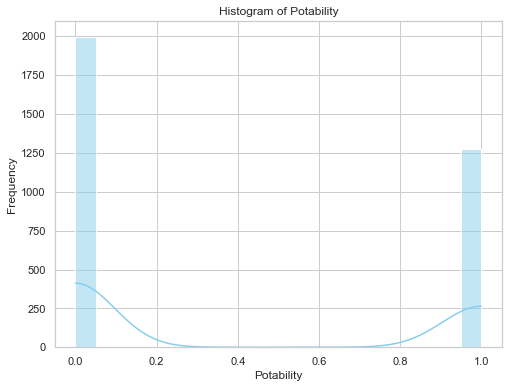

In [15]:
# Set plot style
sns.set(style="whitegrid")

# 1. Histogram 
for x in data_imputed.columns :    
        plt.figure(figsize=(8, 6))
        sns.histplot(data_imputed[x], bins=20, kde=True, color='skyblue')
        plt.title('Histogram of '+x)
        plt.xlabel(x)
        plt.ylabel('Frequency')
        plt.show()

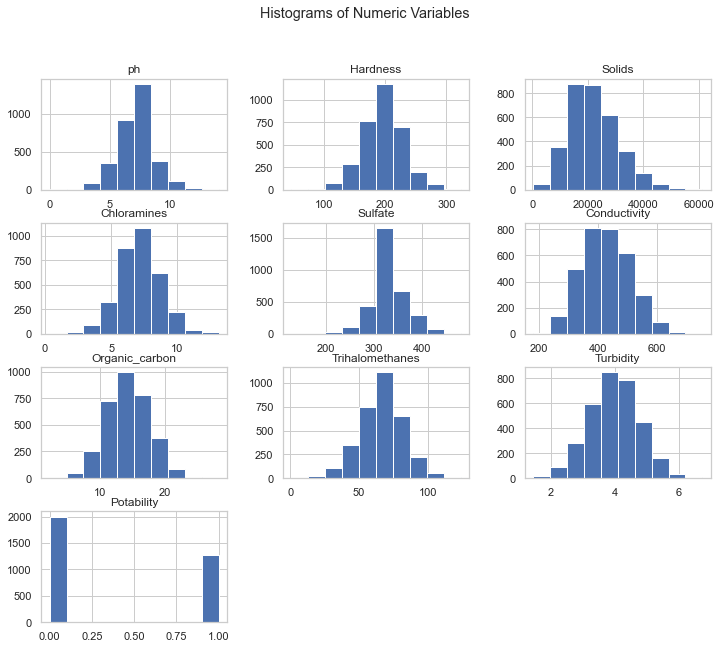

In [12]:
# Plot histograms for all numeric columns
data_imputed.hist(figsize=(12, 10))
plt.suptitle("Histograms of Numeric Variables")
plt.show()

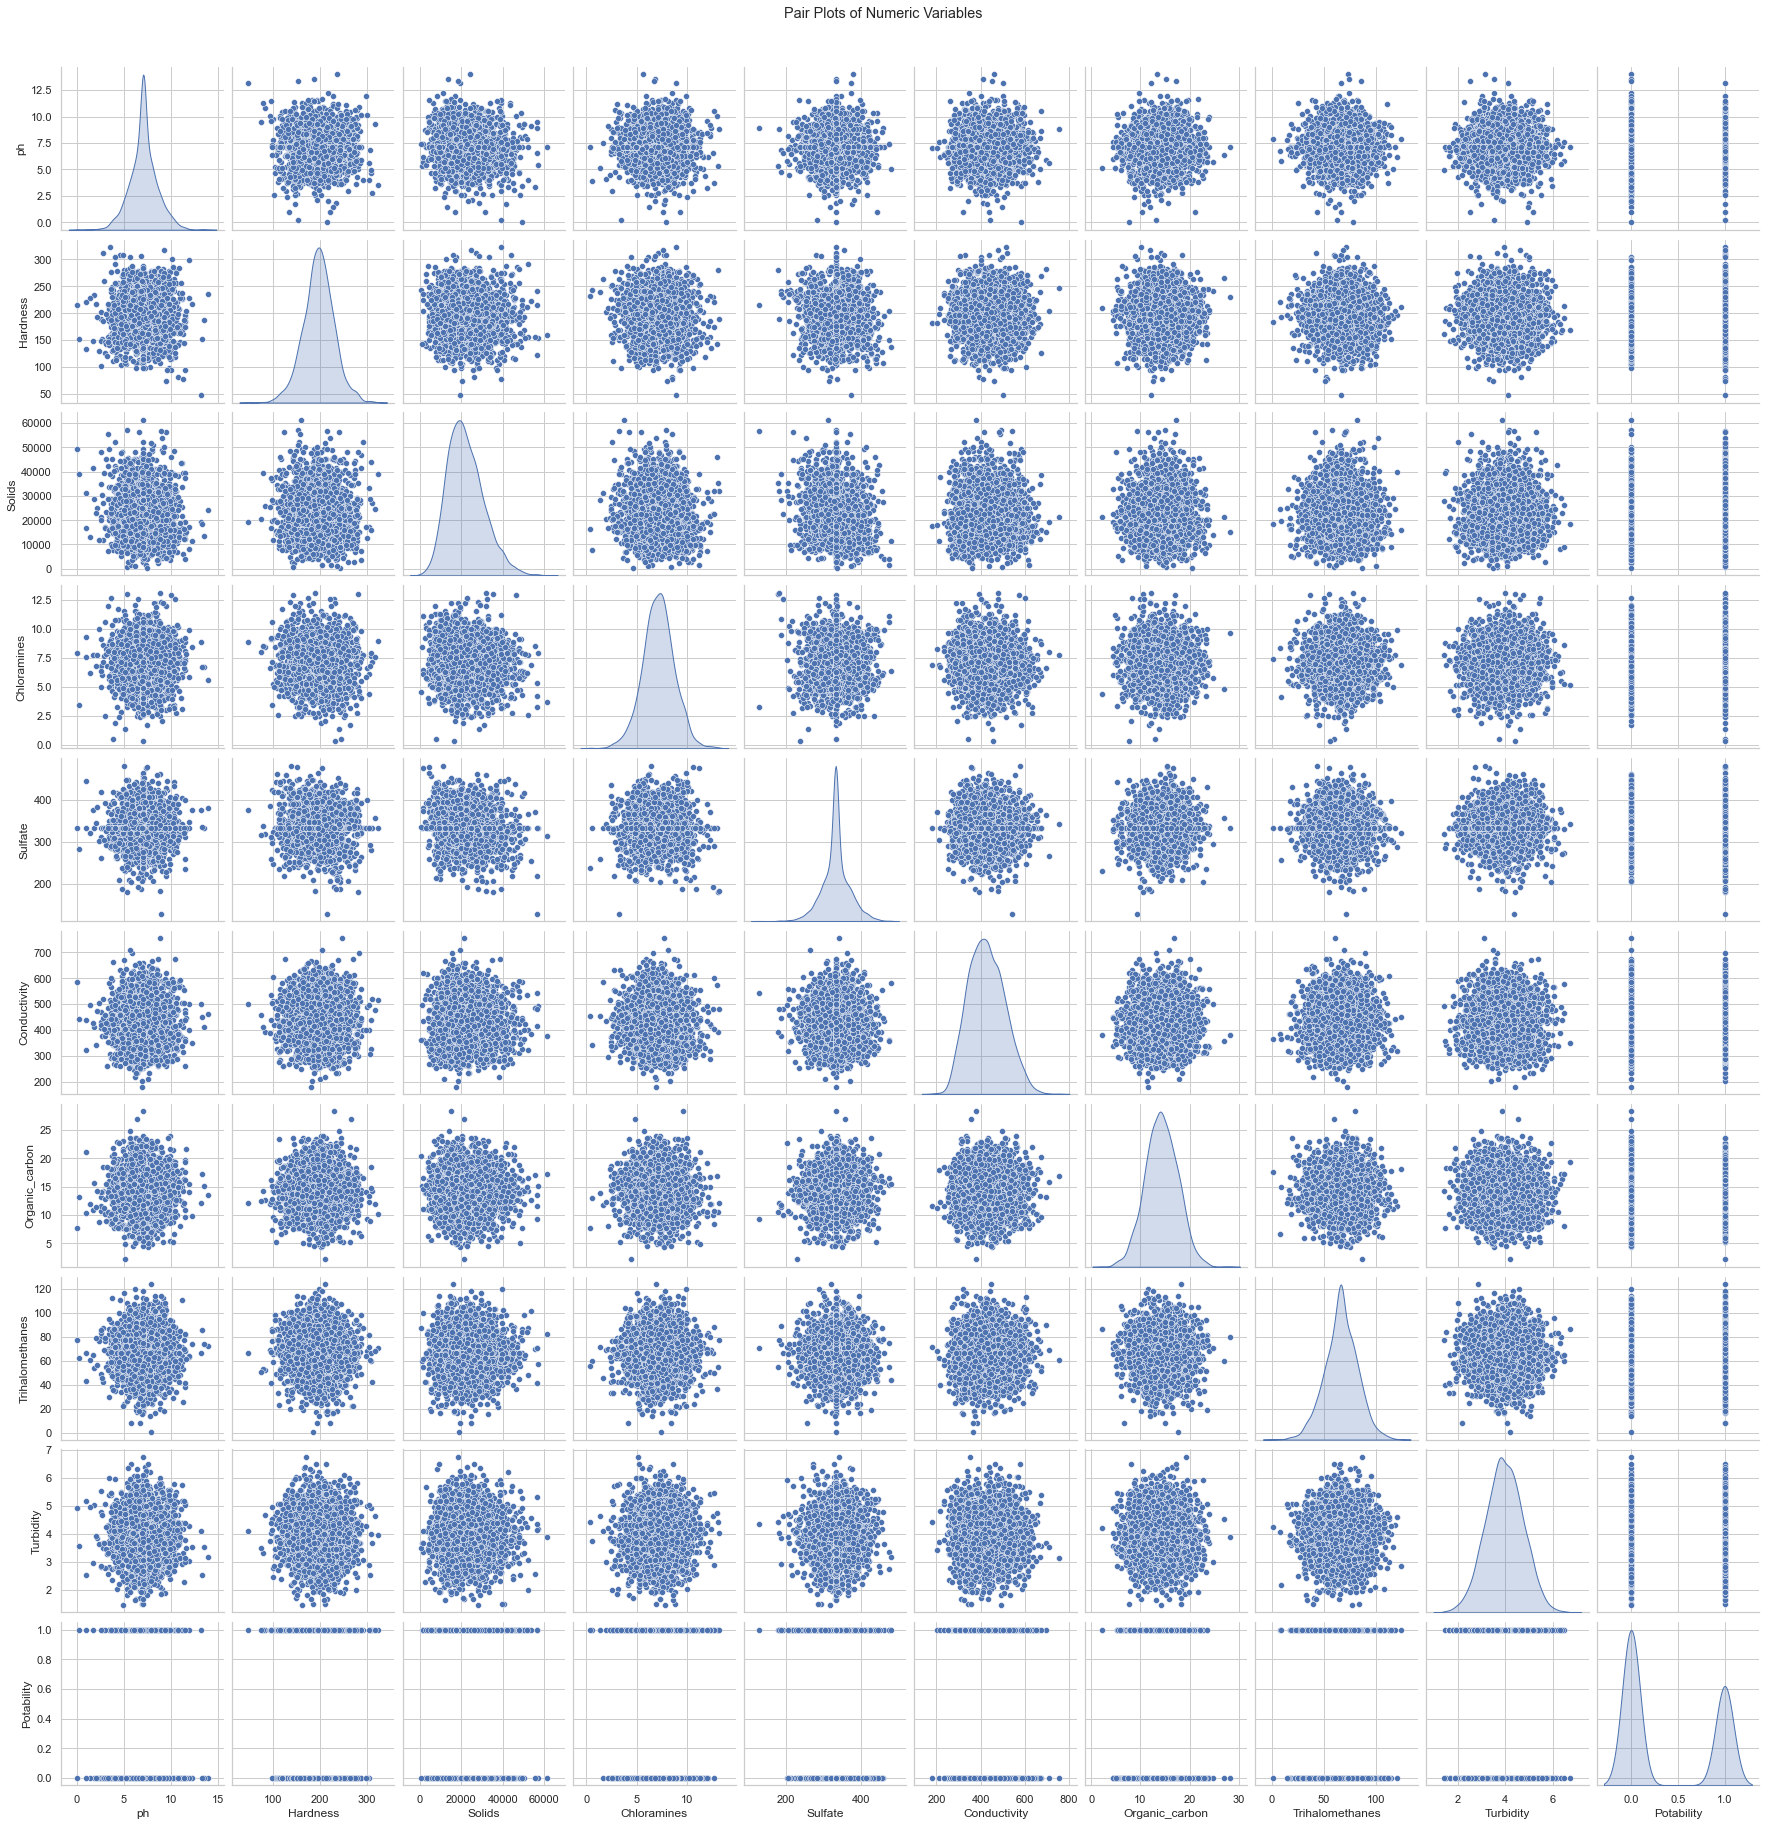

In [13]:
# Plot pair plots
sns.pairplot(data_imputed, diag_kind='kde')
plt.suptitle("Pair Plots of Numeric Variables", y=1.02)
plt.show()

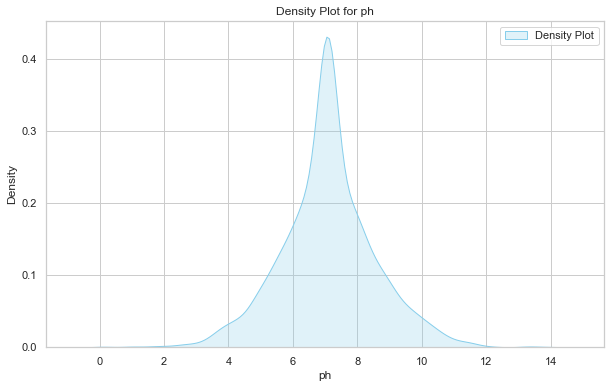

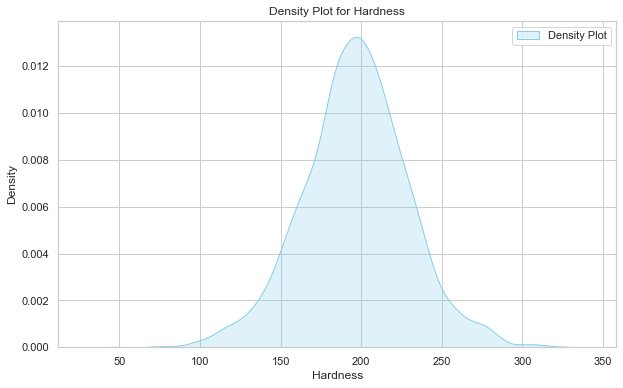

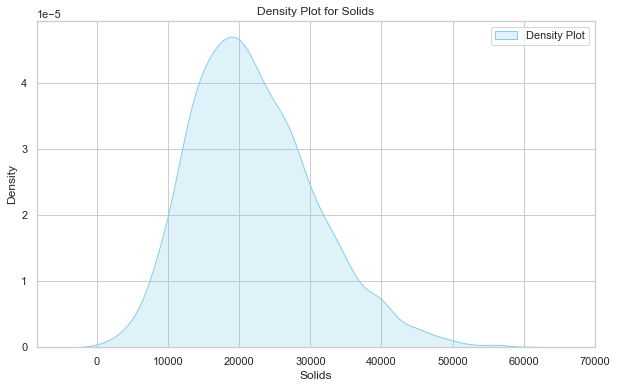

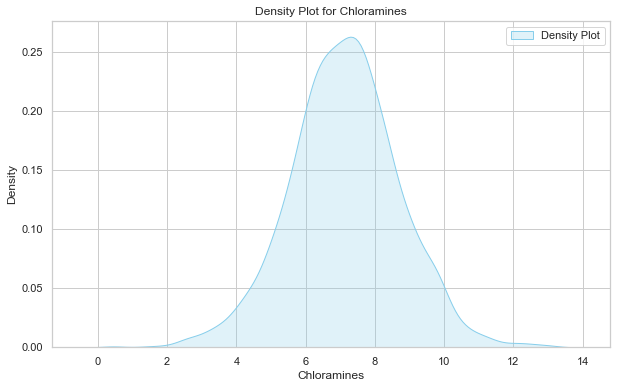

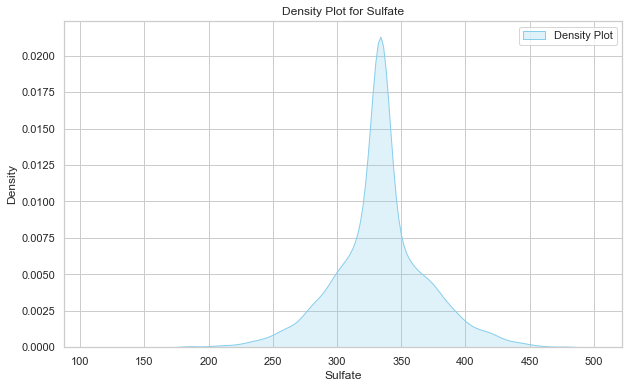

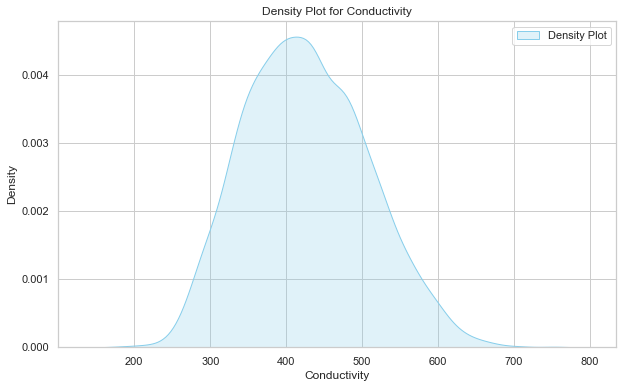

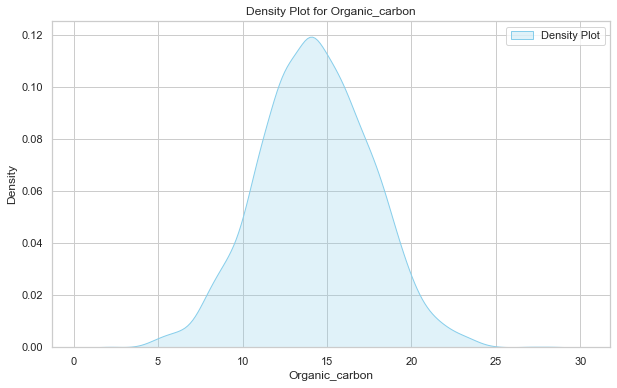

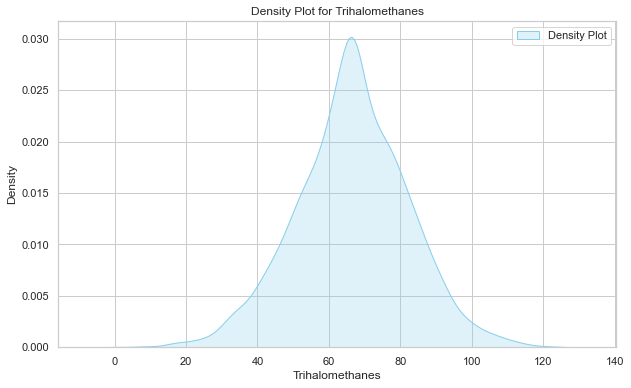

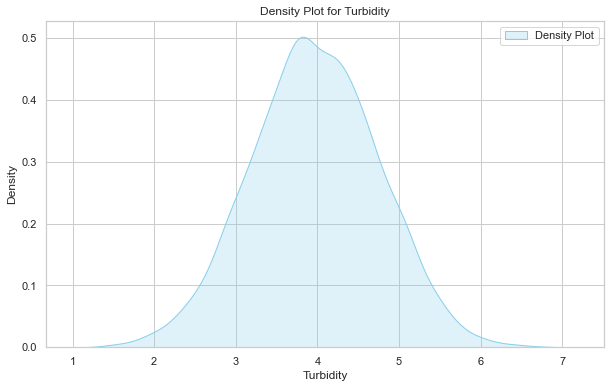

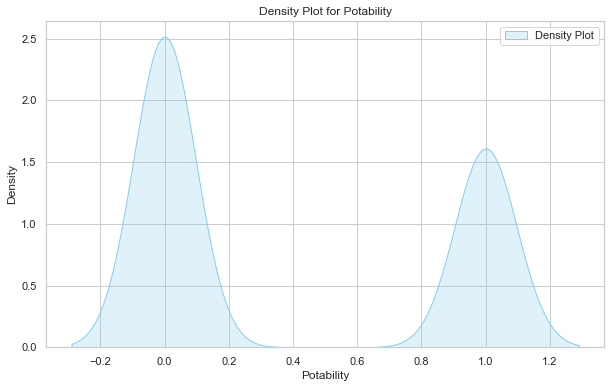

In [14]:
for x in data_imputed:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data_imputed[x], fill=True, color='skyblue', label='Density Plot')
    plt.title('Density Plot for '+x)
    plt.xlabel(x)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

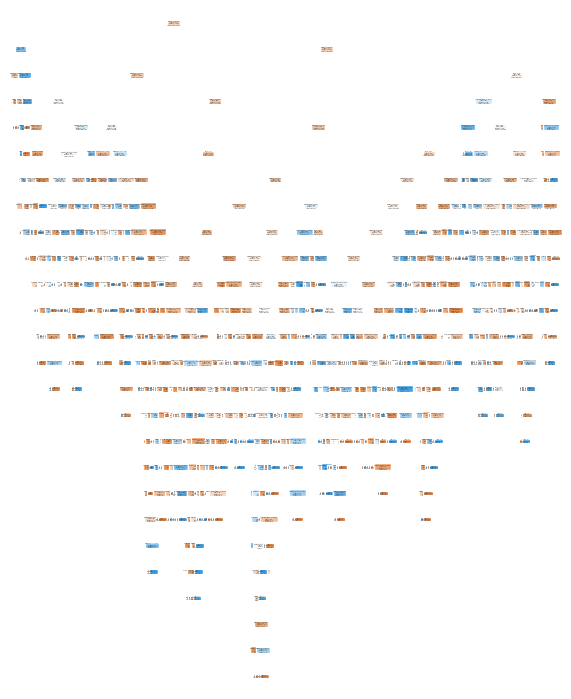

In [15]:

X = data_imputed.drop('Potability', axis=1)
Y = data_imputed['Potability']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train , y_train)
d_tree_pred = d_tree.predict(x_test)

plt.figure(figsize = (7,9),dpi = 100)
plot_tree(d_tree,feature_names=X.columns,filled=True)
plt.show()



Decision Tree Model:
Accuracy: 0.5777
Confusion Matrix:
[[255 157]
 [120 124]]



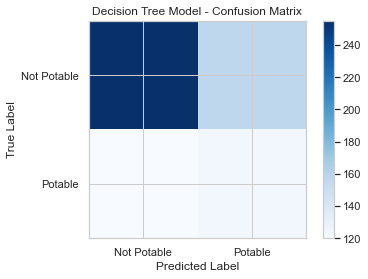

KNN Model:
Accuracy: 0.5412
Confusion Matrix:
[[295 117]
 [184  60]]



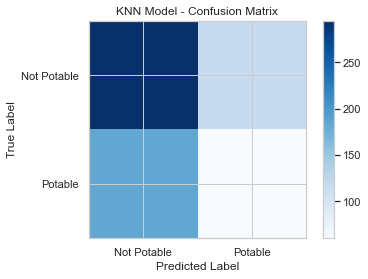

SVM Model:
Accuracy: 0.6204
Confusion Matrix:
[[407   5]
 [244   0]]



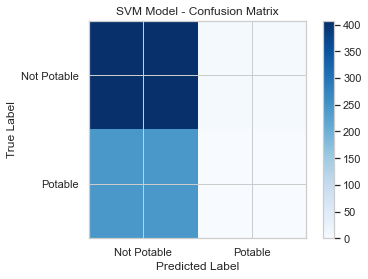

Bagging Model:
Accuracy: 0.6692
Confusion Matrix:
[[347  65]
 [152  92]]



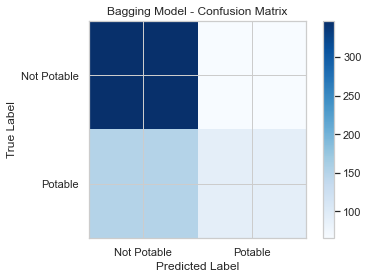

Boosting Model:
Accuracy: 0.6204
Confusion Matrix:
[[360  52]
 [197  47]]



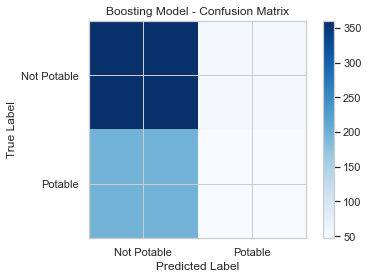

In [16]:
# Separate features and target variable
X = data_imputed.drop('Potability', axis=1)
y = data_imputed['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)

# SVM
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

# Bagging
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_pred = bagging_classifier.predict(X_test)

# Boosting
boosting_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_classifier.fit(X_train, y_train)
boosting_pred = boosting_classifier.predict(X_test)

# Evaluate models
models = {
    'Decision Tree': dt_pred,
    'KNN': knn_pred,
    'SVM': svm_pred,
    'Bagging': bagging_pred,
    'Boosting': boosting_pred
}

for name, pred in models.items():
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    
    print(f"{name} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} Model - Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Not Potable', 'Potable'])
    plt.yticks([0, 1], ['Not Potable', 'Potable'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score

# ... (previous code remains the same)

for name, pred in models.items():
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print(f"{name} with Bagging Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

    # ... (plotting confusion matrix remains the same)


Decision Tree with Bagging Model:
Accuracy: 0.5777
Precision: 0.4413
Recall: 0.5082
Confusion Matrix:
[[255 157]
 [120 124]]

KNN with Bagging Model:
Accuracy: 0.5412
Precision: 0.3390
Recall: 0.2459
Confusion Matrix:
[[295 117]
 [184  60]]

SVM with Bagging Model:
Accuracy: 0.6204
Precision: 0.0000
Recall: 0.0000
Confusion Matrix:
[[407   5]
 [244   0]]

Bagging with Bagging Model:
Accuracy: 0.6692
Precision: 0.5860
Recall: 0.3770
Confusion Matrix:
[[347  65]
 [152  92]]

Boosting with Bagging Model:
Accuracy: 0.6204
Precision: 0.4747
Recall: 0.1926
Confusion Matrix:
[[360  52]
 [197  47]]



In [18]:
data_imputed.to_csv("water_potability_cleaned.csv",index=False)